In [ ]:
!pip install transformers evaluate datasets torch pandas numpy scikit-learn seaborn wordcloud nltk tensorflow pdfplumber imblearn imbalanced-learn tf-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install pdfplumber

In [ ]:
import re
import nltk
import pdfplumber
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from attr.validators import max_len
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
# Convert categories to numerical labels
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Swapping RandomOverSampler With SMOTE as it inadvertently introduces noise or overfit synthetic examples
from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE
from collections import Counter
# Download required NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df.sample(10)

,Category,Resume
797,ETL Developer,SKILL SET â Talend Big Data â Informatica ...
508,Electrical Engineering,â¢ Achievement oriented with people managemen...
441,SAP Developer,Education Details \r\nJanuary 2016 Bachelor Of...
410,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...
655,Network Security Engineer,Skill Set â¢â¢Cisco Certified Network Associ...
904,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
130,Arts,"Additional qualifications April 2000, Web Desi..."
315,Civil Engineer,SKILLS â¢ 1.Autocad â¢ 2.Pro v â¢ 3.Catia â...
42,HR,Education Details \r\n BA mumbai University\...
487,Electrical Engineering,Education Details \r\n\r\nElectrical engineeri...


In [ ]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
# As there are no Null Values left we don't have to Handle the missing values.
# Data Analysis:
print(f"Total Resumes: {len(df)}")
print(f'Number of Unique Job Categories : {df["Category"].nunique()}')

Total Resumes: 962
Number of Unique Job Categories : 25


In [ ]:
# Understanding Class Distribution:
print('Value Count of Unique Job Categories')
print(df["Category"].value_counts())

Value Count of Unique Job Categories
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


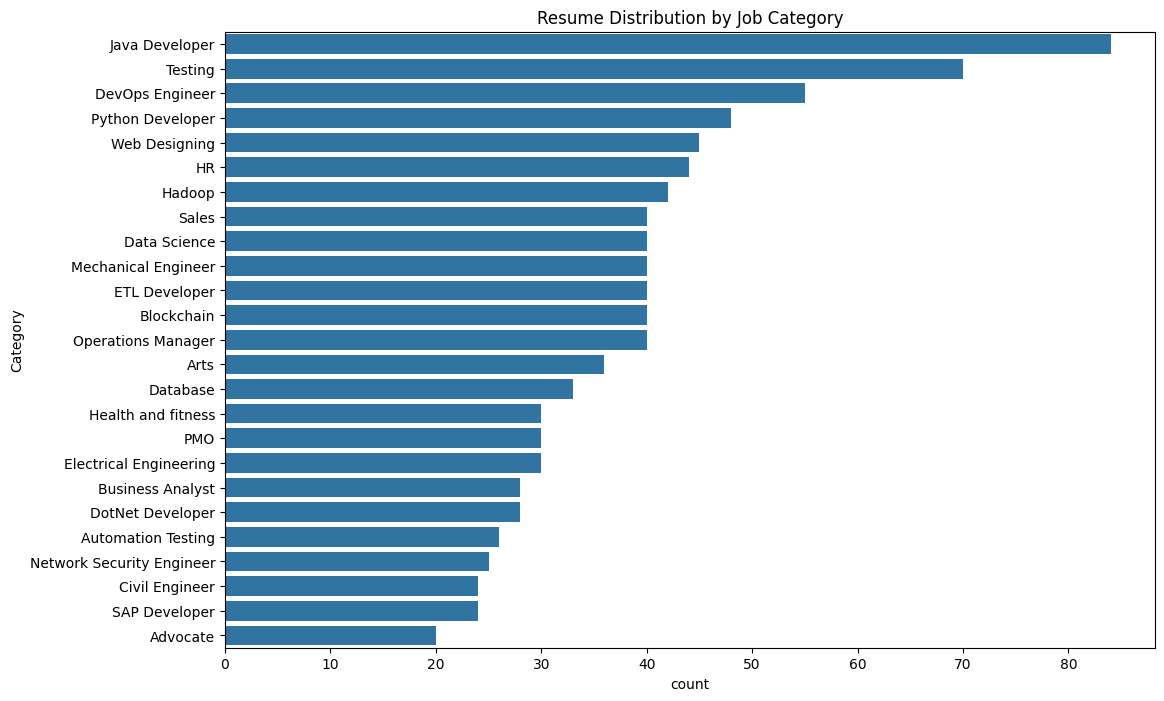

In [ ]:
# Visualizations:
# Bar Chart to Visualize the Categories
plt.figure(figsize=(12,8))
sns.countplot(y = "Category", data = df, order = df['Category'].value_counts().index)
plt.title("Resume Distribution by Job Category")
plt.show()

In [ ]:
def plot_wordcloud(text, title):
    wordcolud = WordCloud(width = 1600, height = 1000, background_color= 'white').generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcolud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

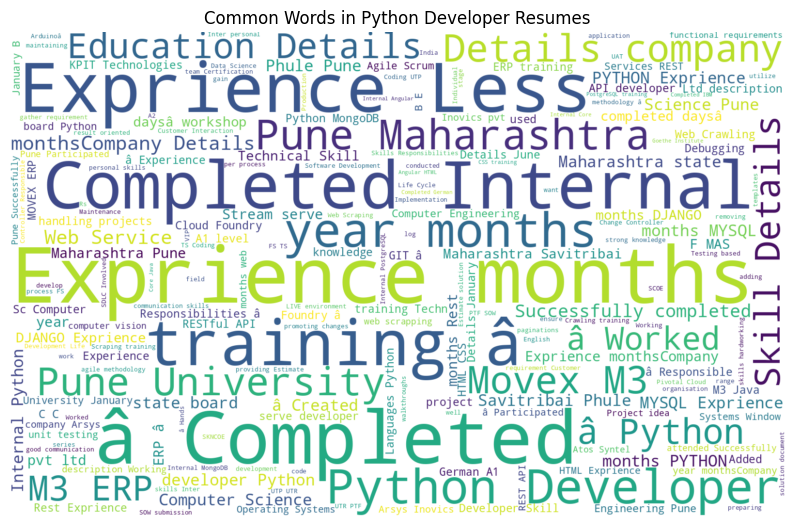

In [ ]:
# Exploring the Word Cloud of Few Categories
python_developer_resumes = ' '.join(df[df['Category'] == 'Python Developer']['Resume'])
plot_wordcloud(python_developer_resumes, "Common Words in Python Developer Resumes")

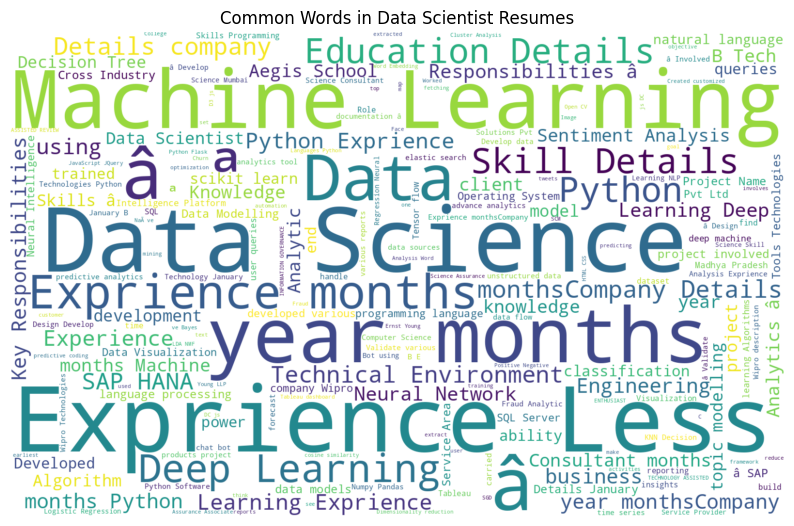

In [ ]:
data_scientist_resumes = ' '.join(df[df['Category'] == 'Data Science']['Resume'])
plot_wordcloud(data_scientist_resumes, "Common Words in Data Scientist Resumes")

In [ ]:
def get_top_ngrams(text, n , top_k = 10):
    vec = CountVectorizer(ngram_range= (n, n))
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_frequency = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_frequency = sorted(words_frequency, key=lambda x: x[1], reverse=True)
    return words_frequency[:top_k]

dotnet_developer_resumes_text = df[df['Category'] == 'DotNet Developer']['Resume']
top_ngrams = get_top_ngrams(dotnet_developer_resumes_text, 2)
print("Top Bigrams in DotNet Developer Resumes:")
for word, freq in top_ngrams:
    print(f'{word} : {freq}')

Top Bigrams in DotNet Developer Resumes:
asp net : 108
sql server : 92
exprience less : 84
less than : 84
than year : 84
dot net : 76
year months : 72
net developer : 64
management system : 60
visual studio : 52


In [ ]:
# Data Cleaning:
def clean_resumes(resumeText):
    stop_words = set(stopwords.words('english'))
    #Remove the URL's
    resumeText = re.sub('http\S+\s*' , ' ', resumeText)
    # remove RT and cc
    resumeText = re.sub('RT|cc', ' ', resumeText)
    # remove hashtags
    resumeText = re.sub('#\S+', '', resumeText)
    # remove mentions
    resumeText = re.sub('@\S+', '  ', resumeText)
    # remove punctuations
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    # remove special characters, emojis, or non-English text
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    # Remove extra spaces
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()

    tokens = resumeText.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]

    return " ".join(filtered_tokens)


In [ ]:
df['Cleaned'] = df['Resume'].apply(lambda x : clean_resumes(x))
df['Cleaned'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists elerating review process run anal

In [ ]:
# Label Encoding
encoder = LabelEncoder()
df["category_encoded"] = encoder.fit_transform(df["Category"])

# Tokenization and Padding
# tokenizer = Tokenizer(num_words = 50000, oov_token = '<OOV>')
# tokenizer.fit_on_texts(df['Cleaned'])
# x_seq = tokenizer.texts_to_sequences(df['Cleaned'])
# x_padded = pad_sequences(x_seq, maxlen=200, padding='post')


# Split into training and test sets (we use the cleaned text and labels)
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Cleaned'].tolist(), df["category_encoded"].tolist(), test_size=0.2, random_state=42)

In [ ]:
#Handle Class Imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
train_texts_array = np.array(train_texts).reshape(-1, 1)
train_texts_resampled, train_labels_resampled = ros.fit_resample(train_texts_array, np.array(train_labels))
train_texts_resampled = train_texts_resampled.flatten().tolist()

# Check class balance after resampling
print("Class distribution after oversampling:", Counter(train_labels_resampled))
print("Original training samples:", len(train_texts))
print("Resampled training samples:", len(train_texts_resampled))

Class distribution after oversampling: Counter({np.int64(2): 69, np.int64(3): 69, np.int64(18): 69, np.int64(14): 69, np.int64(1): 69, np.int64(12): 69, np.int64(13): 69, np.int64(22): 69, np.int64(11): 69, np.int64(23): 69, np.int64(15): 69, np.int64(19): 69, np.int64(6): 69, np.int64(0): 69, np.int64(8): 69, np.int64(9): 69, np.int64(16): 69, np.int64(4): 69, np.int64(20): 69, np.int64(7): 69, np.int64(5): 69, np.int64(21): 69, np.int64(10): 69, np.int64(17): 69, np.int64(24): 69})
Original training samples: 769
Resampled training samples: 1725


In [ ]:
# Imports for BERT Model:
import torch
import evaluate
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

class ResumeDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len = 256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoder = self.tokenizer(
            self.texts[idx],
            truncation = 'longest_first',
            padding = 'max_length',
            max_length = self.max_len,
            return_tensors = 'pt'
        )

        # Remove the Batch dimension for each tensor
        item = {key : value.squeeze(0) for key,value in encoder.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype = torch.long)
        return item

# Load BERT Model:
model_name = "bert-base-uncased"
bert_tokenizer = BertTokenizer.from_pretrained(model_name)

# Determine the Count of Unique Labels:
unique_label_count = df['category_encoded'].nunique()
model = BertForSequenceClassification.from_pretrained(model_name, num_labels = unique_label_count)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Creating PyTorch Datasets for training and evaluation.
train_dataset = ResumeDataset(train_texts_resampled, train_labels_resampled, bert_tokenizer, max_len= 256)
evaluation_dataset = ResumeDataset(test_texts, test_labels , bert_tokenizer, max_len= 256)

In [ ]:
# Evaluation Metrics for the Model:
accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')
precision_metric = evaluate.load('precision')
recall_metric = evaluate.load('recall')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis = 1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='weighted')
    precision = precision_metric.compute(predictions=predictions, references=labels, average='weighted')
    recall = recall_metric.compute(predictions=predictions, references=labels, average='weighted')
    return {
        'accuracy' : accuracy['accuracy'],
        'f1' : f1['f1'],
        'precision' : precision['precision'],
        'recall' : recall['recall']
    }

In [ ]:
# Define Training Parameters:
training_args = TrainingArguments(
    output_dir = './output',
    num_train_epochs = 3,
    per_device_train_batch_size = 8,
    per_device_eval_batch_size = 8,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    logging_dir = './logs',
    logging_steps = 10,
    load_best_model_at_end = True,
    report_to=[],
    fp16=True
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Create the Trainer:
trainer = Trainer(
    model = model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=evaluation_dataset,
    compute_metrics = compute_metrics
)

In [23]:
# Train the model
trainer.train()

# Evaluate the model on the validation set
eval_results = trainer.evaluate()
print("Evaluation Metrics:", eval_results)

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.610800,0.456509,0.989637,0.989510,0.990609,0.989637


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.610800,0.456509,0.989637,0.989510,0.990609,0.989637
2,0.037700,0.039357,0.989637,0.989613,0.990933,0.989637
3,0.021800,0.016301,1.000000,1.000000,1.000000,1.000000


Evaluation Metrics: {'eval_loss': 0.016301104798913002, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 141.8316, 'eval_samples_per_second': 1.361, 'eval_steps_per_second': 0.176, 'epoch': 3.0}


In [28]:
def predict_category(resume_text):
    resume_cleaned = clean_resumes(resume_text)
    # Tokenize using the BERT tokenizer
    encoding = bert_tokenizer(
        resume_cleaned,
        truncation = 'longest_first',
        padding = 'max_length',
        max_length = 256,
        return_tensors = 'pt'
    )

    # Get Prediction
    model.eval()
    with torch.no_grad():
        outputs = model(**encoding)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim = 1).item()

    # Inverse transform to get the original category name
    return encoder.inverse_transform([predicted_class])[0]

def extract_text(pdf_path ):
    text = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:  # Only add if text was extracted
                text.append(page_text)

    return '\n'.join(text).strip() if text else ""

new_resume = extract_text('Rahul Victor Sunkara_UpdatedResume.pdf')

In [29]:
print(new_resume)
print(actual_category)

R A H U L V I C T O R S U N K A R A
rahulvictorsunkara@gmail.com | 9182509107
PROFILE
Enthusiastic, dedicated, and detail-oriented Software Engineer with over 3 years of experience in developing, deploying, and testing fully
functional websites and applications. Pursuing a Master’s degree with a focus on advanced concepts in Machine Learning and AI. Strong
problem-solving abilities and a solid understanding of scripting, coding principles, and software design. Skilled in building and fine-tuning
machine learning models, conducting data preprocessing, and performing EDA for actionable insights.
SKILLS WORK EXPERIENCE
Programming Languages : C#,
Software Engineer | Cognizant
Python,JavaScript, PL/SQL
10/2023 - Present | Hyderabad, IN
Backend Development: microservices
Designed and implemented full-stack solutions using RESTful APIs,
architecture using .NET Core, Web API, and
Microservice Architecture, and Database Management. Developed and
LINQ.
maintained RESTful API Microservices, Web 

In [30]:
print("Predicted Category:", predict_category(new_resume))

Predicted Category: DevOps Engineer
